In [1]:
import pandas as pd

In [3]:
import os
import json
import numpy as np

data = []
with open('courseCodeSubmit-20191015.json', encoding="utf8") as file:    
     data = json.load(file)
new_data=[]
for i in data.keys():
    temp=data[i]
    if "duration" in temp[0].keys():
        for j in range(len(temp)):
            new_data.append(list(temp[j].values()))
final_data=[]
for i in range(len(new_data)):
    if len(new_data[i])==18:
        final_data.append(new_data[i])
        
final_data=np.array(final_data).reshape(-1,18)
final_data=pd.DataFrame(final_data)
final_data.columns=data['Course-1565734186418'][0].keys()
final_data.head()

,_id,courseId,lessonId,exerciseId,uid,kernel,updated,error,code,codeType,status,updated_time,unit,env,submitType,exeTime,duration,_ip
0,5d1ab5d471afea5b2973b2df,Course-1561957950776,9e3a1070-3680-11e9-af86-9fcbc1471ded,6332e207-8e7c-4ad5-907c-ce5b689efae1,jimmy921009-gmail-com,airabbi,1562031572209.0,,"print(""heiip world"")",python,ExecFinished,2019/07/02 09:39:32,airabbi,fut,exec,163,763,"210.68.224.132, 210.68.224.132"
1,5d1ab5df71afea5b2973b2f9,Course-1561957950776,9e3a1070-3680-11e9-af86-9fcbc1471ded,6332e207-8e7c-4ad5-907c-ce5b689efae1,youheng331-gmail-com,airabbi,1562031583614.0,,"print(""hello world"")",python,ExecFinished,2019/07/02 09:39:43,airabbi,fut,exec,173,779,"210.68.224.132, 210.68.224.132"
2,5d1ab5e371afea5b2973b306,Course-1561957950776,9e3a1070-3680-11e9-af86-9fcbc1471ded,6332e207-8e7c-4ad5-907c-ce5b689efae1,jimmy921009-gmail-com,airabbi,1562031587578.0,,"print(""hello world"")",python,ExecFinished,2019/07/02 09:39:47,airabbi,fut,exec,167,772,"210.68.224.132, 210.68.224.132"
3,5d1ab60f71afea5b2973b347,Course-1561957950776,9e3a1070-3680-11e9-af86-9fcbc1471ded,6332e207-8e7c-4ad5-907c-ce5b689efae1,aop68067565-gmail-com,airabbi,1562031631203.0,,"print(""hello world"")",python,ExecFinished,2019/07/02 09:40:31,airabbi,fut,exec,173,786,"210.68.224.132, 210.68.224.132"
4,5d1ab68571afea5b2973b434,Course-1561957950776,9e3a1070-3680-11e9-af86-9fcbc1471ded,6332e207-8e7c-4ad5-907c-ce5b689efae1,maggie21188-gmail-com,airabbi,1562031748944.0,SyntaxError,print{hellow},python,Error,2019/07/02 09:42:28,airabbi,fut,exec,274,878,"210.68.224.132, 210.68.224.132"


In [5]:
#data['Course-1559634742425'][0]
#data['Course-1565734186418'][0]

In [6]:
###Status 總共有幾種
pd.unique(final_data["status"])

array(['ExecFinished', 'Error', 'TestError', 'Finished', 'UserStop',
       'SysError'], dtype=object)

In [7]:
#資料中有幾道題目
len(pd.unique(final_data["exerciseId"]))

103

In [8]:
#資料內總共有幾位學生
len(pd.unique(final_data["uid"]))

54

In [9]:
#計算正確率
def map(x):
    if x=='ExecFinished':
        return "1"
    else:
        return "0"
final_data["correct_rate"]=final_data["status"].apply(map)

In [10]:
final_data["correct_rate"].value_counts()

1    3279
0    3069
Name: correct_rate, dtype: int64

In [11]:
final_data["correct_rate"]=final_data["correct_rate"].apply(lambda x:int(x))
final_data["duration"]=final_data["duration"].apply(lambda x:int(x))

In [12]:
def is_outlier(s):
    lower_limit = s.mean() - (s.std() * 3)
    upper_limit = s.mean() + (s.std() * 3)
    return ~s.between(lower_limit, upper_limit)
###remove outliers in the group before aggregating
final = final_data[~final_data.groupby('exerciseId')['duration'].apply(is_outlier)]
final.shape

(6261, 19)

In [13]:
a1=final_data.pivot_table(index="exerciseId",columns="uid",aggfunc='count')
a1

_id  \
uid                                  099094-mail-fhps-tp-edu-tw   
exerciseId                                                        
0483fbf5-2222-4b86-b05d-ed726252ca55                        3.0   
067056e9-cab3-4107-89ee-fabe7fca7bf7                        NaN   
07d2687b-0111-4cba-822b-eb7f7090557b                        2.0   
0fba1d5b-485c-4637-9d5c-69f9d0c62d5d                       11.0   
10671778-37e4-4eee-b318-39afdcc178ba                        NaN   
13abc2fb-9a42-4e5a-b255-a6d101b8dbb6                        NaN   
146edb82-aa00-489c-9bd5-8241f393ca99                        6.0   
16b2a2e6-6cc2-4297-baec-205b78d47b1a                        NaN   
1721c9a9-7686-4c10-a1de-18fa7c879617                        NaN   
1bd4e922-0dc1-430c-927b-015811764cfa                        9.0   
1d6233b2-07ea-422a-93ec-60be72324b5f                        NaN   
1ffa3a90-b462-4fbe-b356-f94f2d386684                        NaN   
255f7335-e7af-4049-ae6a-a79d8e6ed0c3                        NaN   
25ec2b87-0bcc-4a35-8d58-90d32b25218e                        NaN   
291b4e96-cbea-46c7-8b9f-8379caf85a51                        2.0   
2b6bcc91-0139-4066-9a0d-683a7afb0518                        NaN   
317b0107-c338-42d9-bc4f-ad3fcc017f01                        3.0   
32a252c5-7841-4898-890e-abe69bd18c4d                        NaN   
387e5cf2-4bf7-4e74-8114-6781a3cb405f                       63.0   
3cc2f931-413a-4be0-9b10-d689cb1aca4f                        1.0   
3e4c6104-614a-4dd0-a5b6-d0554d682f85                        NaN   
3ee3b7c0-b90e-43dc-8ce4-1bce7a3b705c                        NaN   
4336be30-8fdd-46e2-9cf0-d73dd95d05c7                        NaN   
44382168-cf1f-4573-9c22-a24a7a9e6532                        2.0   
4527f7fe-871a-41df-b583-6af00a4b2c71                        2.0   
47a7a18b-ae99-4dcb-94cb-c74c274bc334                        2.0   
47b3f949-fbe2-4540-9ce3-db2d63a65ae5                        NaN   
47c56ceb-048c-4b27-84ca-b071da32bc85                       14.0   
4d9eda31-49c6-4e15-99f1-860d18bccde5                        NaN   
50e37151-401a-4d2d-9147-01fde238b4ab                        2.0   
...                                                         ...   
b7d90874-cb61-4b14-951d-7ef31047d1d5                        4.0   
b8957fd5-c5de-4da0-967e-df920eb442eb                        NaN   
b8fada50-5672-4f84-951a-a856ad822b66                        7.0   
b96b46b2-7aa9-4fa1-abec-e9887ef55fac                        NaN   
bc2f5b98-a589-4b79-aedb-3d40cdf66d80                        NaN   
bea492d2-d840-4c39-a07f-464b577f66e3                        NaN   
bece9106-6d5e-4726-b3f6-d2f57c1464f2                        NaN   
c40ff1e3-7d2f-4dad-8177-3e94b51ab477                        NaN   
c5106a44-b7ee-4e1d-843a-2e9d22a8cca5                        NaN   
c5689e3b-0d5a-4ec6-a666-2dc3b9daa20a                        NaN   
c88ddb96-3633-4b29-9a27-b12edb861393                        NaN   
c915f4d7-6d12-417a-bb89-2d755806e7d7                        1.0   
ca604956-fd15-4d3f-989b-c35bf077b62f                        2.0   
d1a10873-0ea7-4f8d-9862-04677a6b56f6                        2.0   
d1a60c79-2523-41e7-b617-8e7f241e9d34                        NaN   
d7f282f4-5819-4a36-bfa2-0eb1b5135a93                        NaN   
d876c6d7-f2b3-446c-955e-6ff3674a7bda                        NaN   
dca7ed57-b36c-42da-b7a8-f002602a1fcb                        NaN   
e9e0e8fa-30b0-4bb8-9fb2-8e54a58a9563                        3.0   
ea77e392-8371-48eb-a7d2-e2b35ad1d407                        NaN   
ec278304-5c5e-4858-bb1d-9738d03eadf1                        NaN   
ee233afe-0181-4a1f-ab56-1d90de8e186e                        NaN   
f179de31-3d65-4c5d-9c72-47a6ca794bac                        NaN   
f2106415-0445-47a8-abf6-55ee17b00ca7                        NaN   
f225c8b1-9613-40d7-bf27-109632d030ee                        1.0   
f32160c8-4ee3-49f6-84c2-773b1d3bd522                        NaN   
f7b8a6e4-abfb-42c9-b281-d9120c9c7af2    

In [14]:
med_of_upload=a1.median(axis=1)
med_of_upload[:5]

exerciseId
0483fbf5-2222-4b86-b05d-ed726252ca55    5.0
067056e9-cab3-4107-89ee-fabe7fca7bf7    2.0
07d2687b-0111-4cba-822b-eb7f7090557b    2.0
0fba1d5b-485c-4637-9d5c-69f9d0c62d5d    9.0
10671778-37e4-4eee-b318-39afdcc178ba    2.5
dtype: float64

In [15]:
g=final.groupby('exerciseId')
result=g.agg({'correct_rate':"mean", "duration":"mean"})
result["upload_count"]=med_of_upload
result.head()

,correct_rate,duration,upload_count
exerciseId,,,
0483fbf5-2222-4b86-b05d-ed726252ca55,0.513514,3398.770270,5.0
067056e9-cab3-4107-89ee-fabe7fca7bf7,0.500000,769.136364,2.0
07d2687b-0111-4cba-822b-eb7f7090557b,0.464789,158632.950704,2.0
0fba1d5b-485c-4637-9d5c-69f9d0c62d5d,0.781250,2546.000000,9.0
10671778-37e4-4eee-b318-39afdcc178ba,0.400000,1141.600000,2.5


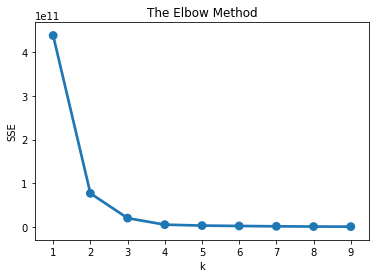

In [17]:
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(result)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster cente
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [18]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(result)
cluster_labels = kmeans.labels_
result = result.assign(Cluster = cluster_labels)
result.head()

,correct_rate,duration,upload_count,Cluster
exerciseId,,,,
0483fbf5-2222-4b86-b05d-ed726252ca55,0.513514,3398.770270,5.0,0
067056e9-cab3-4107-89ee-fabe7fca7bf7,0.500000,769.136364,2.0,0
07d2687b-0111-4cba-822b-eb7f7090557b,0.464789,158632.950704,2.0,2
0fba1d5b-485c-4637-9d5c-69f9d0c62d5d,0.781250,2546.000000,9.0,0
10671778-37e4-4eee-b318-39afdcc178ba,0.400000,1141.600000,2.5,0


In [19]:
result.groupby(['Cluster']).agg({'correct_rate': 'mean','duration': 'median',"upload_count":"mean"})

,correct_rate,duration,upload_count
Cluster,,,
0,0.523785,3636.482143,4.27
1,0.421053,616440.242105,2.00
2,0.444993,178686.672203,2.50


In [20]:
pd.value_counts(result["Cluster"])

0    100
2      2
1      1
Name: Cluster, dtype: int64

In [21]:
di = {0:1,1:3,2:2}
result["Cluster"].replace(di, inplace=True)

In [22]:
result.head()

,correct_rate,duration,upload_count,Cluster
exerciseId,,,,
0483fbf5-2222-4b86-b05d-ed726252ca55,0.513514,3398.770270,5.0,1
067056e9-cab3-4107-89ee-fabe7fca7bf7,0.500000,769.136364,2.0,1
07d2687b-0111-4cba-822b-eb7f7090557b,0.464789,158632.950704,2.0,2
0fba1d5b-485c-4637-9d5c-69f9d0c62d5d,0.781250,2546.000000,9.0,1
10671778-37e4-4eee-b318-39afdcc178ba,0.400000,1141.600000,2.5,1


In [23]:
difficulty={}
for i in range(len(result)):
    difficulty[result.index[i]]=result["Cluster"][i]

In [24]:
#difficulty

In [25]:
temp=[]
for i in range(len(final_data)):
    if final_data["status"][i]=="ExecFinished":
        temp.append(difficulty[final_data["exerciseId"][i]])
    else:
        temp.append(0)
#temp
final_data["answer"]=temp
final_data.head()

,_id,courseId,lessonId,exerciseId,uid,kernel,updated,error,code,codeType,status,updated_time,unit,env,submitType,exeTime,duration,_ip,correct_rate,answer
0,5d1ab5d471afea5b2973b2df,Course-1561957950776,9e3a1070-3680-11e9-af86-9fcbc1471ded,6332e207-8e7c-4ad5-907c-ce5b689efae1,jimmy921009-gmail-com,airabbi,1562031572209.0,,"print(""heiip world"")",python,ExecFinished,2019/07/02 09:39:32,airabbi,fut,exec,163,763,"210.68.224.132, 210.68.224.132",1,1
1,5d1ab5df71afea5b2973b2f9,Course-1561957950776,9e3a1070-3680-11e9-af86-9fcbc1471ded,6332e207-8e7c-4ad5-907c-ce5b689efae1,youheng331-gmail-com,airabbi,1562031583614.0,,"print(""hello world"")",python,ExecFinished,2019/07/02 09:39:43,airabbi,fut,exec,173,779,"210.68.224.132, 210.68.224.132",1,1
2,5d1ab5e371afea5b2973b306,Course-1561957950776,9e3a1070-3680-11e9-af86-9fcbc1471ded,6332e207-8e7c-4ad5-907c-ce5b689efae1,jimmy921009-gmail-com,airabbi,1562031587578.0,,"print(""hello world"")",python,ExecFinished,2019/07/02 09:39:47,airabbi,fut,exec,167,772,"210.68.224.132, 210.68.224.132",1,1
3,5d1ab60f71afea5b2973b347,Course-1561957950776,9e3a1070-3680-11e9-af86-9fcbc1471ded,6332e207-8e7c-4ad5-907c-ce5b689efae1,aop68067565-gmail-com,airabbi,1562031631203.0,,"print(""hello world"")",python,ExecFinished,2019/07/02 09:40:31,airabbi,fut,exec,173,786,"210.68.224.132, 210.68.224.132",1,1
4,5d1ab68571afea5b2973b434,Course-1561957950776,9e3a1070-3680-11e9-af86-9fcbc1471ded,6332e207-8e7c-4ad5-907c-ce5b689efae1,maggie21188-gmail-com,airabbi,1562031748944.0,SyntaxError,print{hellow},python,Error,2019/07/02 09:42:28,airabbi,fut,exec,274,878,"210.68.224.132, 210.68.224.132",0,0


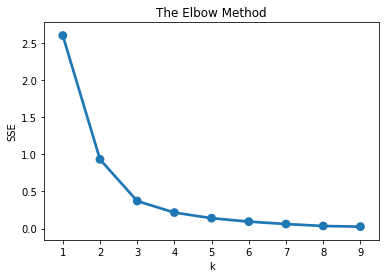

In [26]:
final_result=final_data.groupby(['uid']).agg({'answer': 'mean'})
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(final_result)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster cente
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [27]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(final_result)
cluster_labels = kmeans.labels_
result = final_result.assign(Cluster = cluster_labels)
result.head()

,answer,Cluster
uid,,
099094-mail-fhps-tp-edu-tw,0.503012,0
92robin1117-gmail-com,0.477419,0
a0905561419-gmail-com,0.681818,1
a2359060343-gmail-com,0.389937,0
abc0975773694-gmail-com,0.000000,2


In [28]:
result.groupby(['Cluster']).agg({'answer': 'mean'})

,answer
Cluster,
0,0.464657
1,0.622730
2,0.102496
3,0.835993


In [29]:
pd.value_counts(result["Cluster"])

0    22
1    17
2     9
3     6
Name: Cluster, dtype: int64

Text(0.5,1,'Student ability analysis')

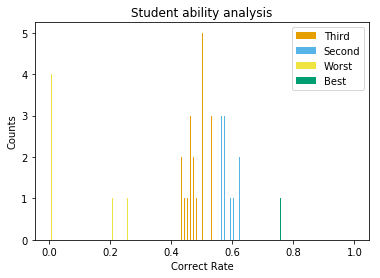

In [30]:
x1=list(result[result["Cluster"]==0]["answer"])
x2=list(result[result["Cluster"]==1]["answer"])
x3=list(result[result["Cluster"]==2]["answer"])
x4=list(result[result["Cluster"]==3]["answer"])
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73']
names = ['Third','Second','Worst','Best']
plt.hist([x1, x2, x3, x4],bins=100,color = colors,label=names)

plt.legend()
plt.xlabel('Correct Rate')
plt.ylabel('Counts')
plt.title('Student ability analysis')

In [32]:
#了解哪門課學生表現最差
final_data.groupby("lessonId")["answer"].mean()

lessonId
9e3a1070-3680-11e9-af86-9fcbc1471ded    0.584501
9e3a3780-3680-11e9-af86-9fcbc1471ded    0.508804
9e3a5e90-3680-11e9-af86-9fcbc1471ded    0.518724
9e3a5e91-3680-11e9-af86-9fcbc1471ded    0.485294
9e3a5e92-3680-11e9-af86-9fcbc1471ded    0.375000
9e3a5e93-3680-11e9-af86-9fcbc1471ded    0.333333
Name: answer, dtype: float64